In [2]:
## input: 1. summarizedExperiement(SE) obj for chromVAR 2. Jaspar matrix 
## output: 1. motif x cell (z score) 2. plot: ranked           
source("./libs.R")

In [13]:
##------------------------------------------------------------
## inputs
##------------------------------------------------------------

input.chromVar.res.list <- readRDS(file = "../dat/output.jaspar.dev.res.Rdata")
input.chromVar.jaspar.z <- assays(input.chromVar.res.list$dev)$z
input.umap.res <- fread('../dat/1908/Islet_123.MNN_corrected.cluster_labels.filt.txt',header = T)
input.chromVar.jaspar.var <- fread("../dat/1908/output.jaspar.var.res.abcd.csv")

In [70]:
input.chromVar.jaspar.z.scale <- input.chromVar.jaspar.z
input.chromVar.jaspar.z.scale[input.chromVar.jaspar.z.scale>4] <- 4
input.chromVar.jaspar.z.scale[input.chromVar.jaspar.z.scale< -4] <- -4


fun.plot.project.motif <- function(motif, input.chromVar.z = input.chromVar.jaspar.z.scale, 
    umap.res = input.umap.res, rescale = F, cls = rev(brewer.pal(n = 11, "RdBu")), 
    bks = c(-4, 0, 4)) {
    require(scales)
    
    motif.idx <- grep(motif, rownames(input.chromVar.z))
    if (length(motif.idx) == 0) {
        message(motif, " is not found!")
        return()
    }
    
    motif.z <- input.chromVar.z[motif.idx[1], ]
    if (rescale) {
        sc <- max(abs(quantile(motif.z, probs = c(0.05, 0.95))))
        motif.z[motif.z > sc] <- sc
        motif.z[motif.z < -sc] <- -sc
    }
    
    motif.z <- motif.z %>% as.data.frame() %>% rownames_to_column("barcodes")
    colnames(motif.z)[2] <- "zval"
    
    tmp <- umap.res %>% right_join(motif.z)
    
    p.default.cluster.motif <- ggplot(tmp, aes(UMAP1, UMAP2)) + geom_point(aes(colour = zval), 
        size = 0.2, shape = 16) + ggtitle(rownames(input.chromVar.jaspar.z)[motif.idx]) + 
        scale_color_gradientn(colours = cls, breaks = bks) + theme_pubr() + theme(text = element_blank(), 
        axis.ticks = element_blank(), legend.position = c(0.2, 0.9), legend.direction = "horizontal", 
        legend.key.width = unit(2, "mm"), legend.key.height = unit(0.1, "inches"), 
        legend.text = element_text(size = 10,family = "Arial"), legend.background = element_rect(fill = "transparent", 
            colour = "transparent"), plot.margin = unit(c(1, 1, -1, -1), "mm"))
    
    p.default.cluster.motif
}

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 600 rows [5, 18, 19, 50, 81, 114, 128, 147, 169, 175, 176, 190, 209, 250, 260, 345, 353, 376, 389, 413, ...].”

barcodes,UMAP1,UMAP2,cluster,cell_type_overall,subtype,log10_n_counts,log10_n_peaks,Islet1,Islet2,Islet3
Islet3-fresh_CTGAAGCTTGCAGCTACTCTCTATTATAGCCT,6.029433,-3.429818,beta_2,beta,2,4.520863,4.152013,0,0,1


[1] 14239    11

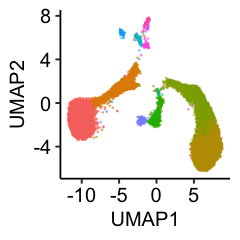

In [50]:
options(repr.plot.width = 2, repr.plot.height = 2)
# filter unkonwn
input.umap.res <- input.umap.res %>% separate(cluster, into = c("cell_type_overall", 
    "subtype"), remove = F)
head(input.umap.res, 1)
dim(input.umap.res)
ggplot(input.umap.res, aes(UMAP1, UMAP2)) + geom_point(aes(color = cluster), size = 0.1, 
    alpha = 0.5) + theme_pubr() + theme(legend.position = "none")

In [30]:
names(input.chromVar.res.list)
dim(input.chromVar.res.list$dev)
dim(input.chromVar.res.list$motif_ix)
dim(input.chromVar.jaspar.z)


[1] "dev"      "motif_ix"

[1]   386 14748

[1] 252132    386

[1]   386 14749

[1] 14239     9

Joining, by = "barcodes"
Joining, by = "barcodes"
Joining, by = "barcodes"
Warning message:
“Removed 715 rows containing missing values (geom_point).”Warning message:
“Removed 715 rows containing missing values (geom_point).”Warning message:
“Removed 715 rows containing missing values (geom_point).”

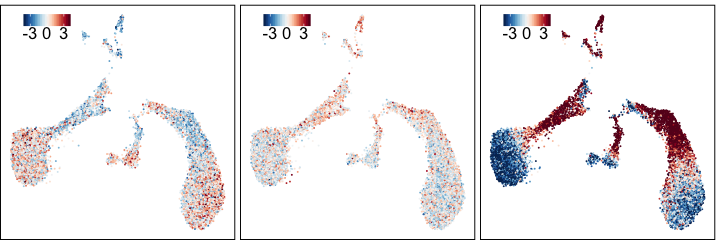

In [71]:
options(repr.plot.width = 6, repr.plot.height = 2)

ps <- lapply(c("RFX3", "XBP1", "FOS::JUN"), fun.plot.project.motif, bks = c(-3, 0, 
    3))
names(ps) <- c("RFX3", "XBP1", "FOS::JUN")
ggarrange(plotlist = ps, ncol = 3,)

In [29]:
table(input.umap.res%>%pull(cluster))


      alpha_1       alpha_2        beta_1        beta_2       delta_1 
         4266          1328          4354          2816           683 
      delta_2 endothelial_1 endothelial_2      exocrine         gamma 
           35            62            95           131           206 
        glial        immune      stellate 
           39            71           153 

### cell-type specific motif between beta and delta

In [ ]:
input.chromVar.jaspar.z

Joining, by = "barcodes"
Joining, by = "barcodes"
Warning message:
“Removed 715 rows containing missing values (geom_point).”Warning message:
“Removed 715 rows containing missing values (geom_point).”

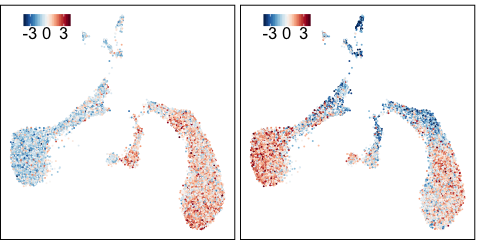

In [73]:
options(repr.plot.width = 4, repr.plot.height = 2)

ps <- lapply(c("PDX1", "FOXA1"), fun.plot.project.motif, bks = c(-3, 0, 
    3))
names(ps) <- c("PDX1", "FOXA1")
ggarrange(plotlist = ps, ncol = 2)

In [4]:
input.umap.res[is.na(input.umap.res)] <- 0

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 600 rows [5, 18, 19, 50, 81, 114, 128, 147, 169, 175, 176, 190, 209, 250, 260, 345, 353, 376, 389, 413, ...].”

In [86]:
input.chromVar.jaspar.z <- data.table(assays(input.chromVar.res.list$dev)$z,keep.rownames = T)
class(input.chromVar.jaspar.z)
head(rownames(input.chromVar.jaspar.z))

[1] "data.table" "data.frame"

[1] "1" "2" "3" "4" "5" "6"

In [98]:
# aggregate data --------------------------------------------------------------
# melt
input.chromVar.jaspar.z.agg <- melt(input.chromVar.jaspar.z, id = "rn", variable.name = "barcodes", 
    value.name = "zval")

# add celltype
input.chromVar.jaspar.z.agg <- merge(input.chromVar.jaspar.z.agg, input.umap.res) 


head(input.chromVar.jaspar.z.agg,1)
dim(input.chromVar.jaspar.z.agg)
dim(input.chromVar.jaspar.z)
table(input.chromVar.jaspar.z.agg%>%pull(cell_type_overall))

barcodes,rn,zval,UMAP1,UMAP2,cluster,cell_type_overall,subtype,log10_n_counts,log10_n_peaks,Islet1,Islet2,Islet3
Islet1-fresh_AGACACCTAAGAGGCAAAGGAGTACCTAT,MA0025.1_NFIL3,-0.3430543,6.975175,-3.232226,beta_1,beta,1,3.694693,3.384174,1,0,0


[1] 5416738      13

[1]   386 14749


      alpha        beta       delta endothelial    exocrine       gamma 
    2136510     2744074      273674       52496       43618       79130 
      glial      immune    stellate 
      13124       22388       51724 

In [100]:
input.chromVar.jaspar.z.agg <- input.chromVar.jaspar.z.agg[complete.cases(input.chromVar.jaspar.z.agg), 
    ] %>% separate(rn, into = c("id", "name"), sep = "_")
range(input.chromVar.jaspar.z.agg$zval)
dim(input.chromVar.jaspar.z.agg)
head(input.chromVar.jaspar.z.agg,1)

[1] -17.90770  33.67385

[1] 5206754      14

barcodes,id,name,zval,UMAP1,UMAP2,cluster,cell_type_overall,subtype,log10_n_counts,log10_n_peaks,Islet1,Islet2,Islet3
Islet1-fresh_AGACACCTAAGAGGCAAAGGAGTACCTAT,MA0025.1,NFIL3,-0.3430543,6.975175,-3.232226,beta_1,beta,1,3.694693,3.384174,1,0,0


In [140]:
input.umap.res.old <- fread('../dat/Islet_123.MNN_corrected.UMAP.txt')
head(input.umap.res.old,1)
dim(input.umap.res.old)

barcodes,UMAP1,UMAP2,cluster,log10_n_counts,log10_n_peaks,Islet1,Islet2,Islet3
Islet3-fresh_CTGAAGCTTGCAGCTACTCTCTATTATAGCCT,6.029433,-3.429818,beta_2,4.520863,4.152013,0,0,1


[1] 15125     9

In [141]:
all(colnames(input.chromVar.jaspar.z)[-1]%in% input.umap.res.old$barcodes)

[1] TRUE

In [142]:
all(input.umap.res$barcodes%in% input.umap.res.old$barcodes)

[1] TRUE

Loading required package: venn


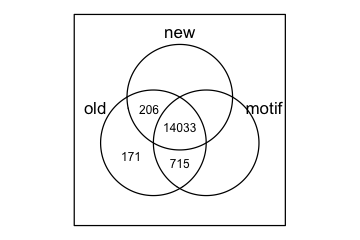

In [144]:
require(venn)
venn(list(old=input.umap.res.old$barcodes,
         new=input.umap.res$barcodes,
         motif=colnames(input.chromVar.jaspar.z)[-1]))

In [143]:
venn(input.umap.res$barcodes%in% colnames(input.chromVar.jaspar.z)[-1])

[1] FALSE

In [138]:
tmp<- input.chromVar.jaspar.z[1,]
dim(input.chromVar.jaspar.z)
tmp[,1:2]
range(tmp[,2:ncol(tmp)])
sum(colnames(input.chromVar.jaspar.z)%in%input.umap.res$barcodes)
dim(tmp)
dim(input.umap.res)
table(input.umap.res$cell_type_overall)
head(input.umap.res$barcodes[!input.umap.res$barcodes%in%colnames(input.chromVar.jaspar.z)],2)

tail(colnames(input.chromVar.jaspar.z)[!colnames(input.chromVar.jaspar.z)%in%input.umap.res$barcodes],4)

[1]   386 14749

rn,Islet1-fresh_AGACACCTAAGAGGCAAAGGAGTACCTAT
MA0025.1_NFIL3,-0.3430543


[1] -4.695352  5.392810

[1] 14033

[1]     1 14749

[1] 14239    11


      alpha        beta       delta endothelial    exocrine       gamma 
       5594        7170         718         157         131         206 
      glial      immune    stellate 
         39          71         153 

[1] "Islet3-fresh_CGCTCATTATCTCAGGCCTAGAGTGTACTGAC"
[2] "Islet3-fresh_TCCGCGAATAGCGCTCGTAAGGAGATAGAGGC"

[1] "Islet3-fresh_TCCGGAGACGATCAGTCTCTCTATATAGAGGC"
[2] "Islet3-fresh_TCCGGAGACGATCAGTTTATGCGAAGGCGAAG"
[3] "Islet3-fresh_TCCGGAGAGGAGCTACTTCTAGCTGGTTGCGT"
[4] "Islet3-fresh_TCCGGAGAGTAGAGGAATCTGAGTTATAGCCT"

In [139]:
table(input.chromVar.jaspar.z.agg %>% filter(name == motif)%>%pull(cell_type_overall))
table(input.chromVar.jaspar.z.agg%>%pull(cell_type_overall))


      alpha        beta       delta endothelial 
       5535        7109         709         136 


      alpha        beta       delta endothelial 
    2136510     2744074      273674       52496 

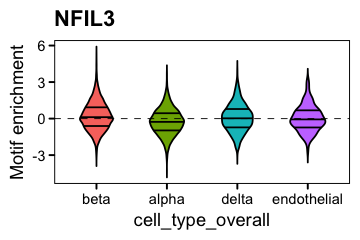

In [119]:
options(repr.plot.width = 3, repr.plot.height = 2)

motif <- "NFIL3"
ggviolin(input.chromVar.jaspar.z.agg %>% filter(name == motif), x = "cell_type_overall",remove = T, 
    width = 0.5, y = "zval", size = 0.5, shape = 16, draw_quantiles=c(.25,.5,.75), 
    fill = "cell_type_overall", ylab = "Motif enrichment") + theme_pubr() + theme(legend.position = "none") + 
    ggtitle(motif)+geom_hline(yintercept = 0,linetype=2,size=.25)

# add = "boxplot", add.params = list(size = 0.25),

In [5]:
# aggregate data --------------------------------------------------------------
# melt
input.chromVar.jaspar.z.agg <- melt(input.chromVar.jaspar.z, id = "rn", variable.name = "barcodes", 
    value.name = "zval")

# add celltype
input.chromVar.jaspar.z.agg <- merge(input.chromVar.jaspar.z.agg, input.umap.res) 

# average over cell type
output.chromvar.jaspar.z.avg_by_ct <- input.chromVar.jaspar.z.agg[, .(zval_avg = mean(zval)), 
    by = .(rn, cell_type_overall)]
output.chromvar.jaspar.z.avg_by_ct <- output.chromvar.jaspar.z.avg_by_ct[, `:=`(zval_avg, 
    (zval_avg - min(zval_avg))/(max(zval_avg) - min(zval_avg))), by = .(rn)]
output.chromvar.jaspar.z.avg_by_ct <- dcast(output.chromvar.jaspar.z.avg_by_ct, rn ~ 
    cell_type_overall, value.var = "zval_avg")
setDF(output.chromvar.jaspar.z.avg_by_ct)
output.chromvar.jaspar.z.avg_by_ct <- output.chromvar.jaspar.z.avg_by_ct %>% separate(rn, 
    into = c("id", "name"), sep = "_") %>% select(-one_of("id")) %>% column_to_rownames("name")

In [6]:
dim(input.chromVar.jaspar.var%>%filter(variability>1.2))

[1] 82  7

cols.subtypes=c(alpha_1='darkred',alpha_2='lightpink',
               beta_1='darkgreen',beta_2='lightgreen',
               delta_1='orange',delta_2='gold',gamma='dodgerblue')
ColSideColors <- data.frame(celltypes=cols.subtypes[annodata$cluster],stringsAsFactors = F)
head(ColSideColors,1)

annodata <- input.umap.res 
setDF(input.chromVar.jaspar.z)
pd <- input.chromVar.jaspar.z[, c("rn", intersect(annodata$barcodes, colnames(input.chromVar.jaspar.z)[-1]))]
pd<- pd%>% column_to_rownames('rn')
annodata <- annodata %>% filter(barcodes %in% colnames(pd)) %>% arrange(cell_type_overall, 
    cluster)

rownames(pd) <- sub(".*_","",rownames(pd))
#pd <- pd[,annodata$barcodes]

pd<- pd[select.motifs[h$tree_row$order],annodata$barcodes]

require(ComplexHeatmap)
Heatmap(pd[seq(ncol(pd), 1, by = -1),],use_raster = TRUE)#, name='mat',column_split = ColSideColors$celltypes, 
#    cluster_rows = F, )

pd[pd>3] <- 3
pd[pd < -3] <- -3 
heatmap3(pd[seq(ncol(pd),1,by = -1),],Rowv=NA, Colv = NA,labCol = rep("",ncol(pd)),
         ColSideColors = ColSideColors$celltypes) 

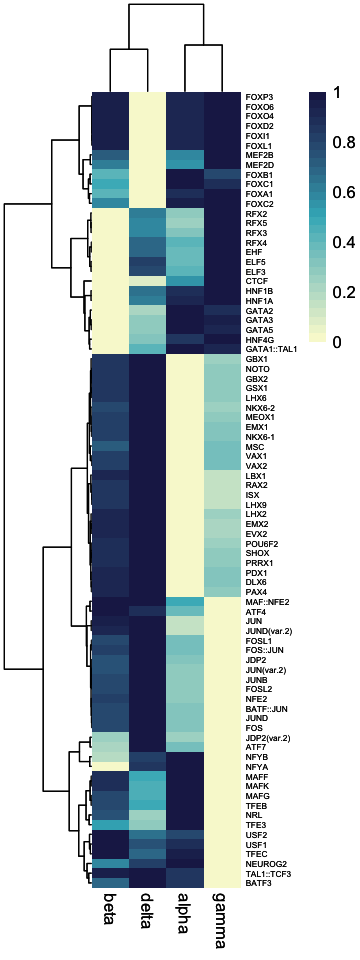

In [10]:
# heatmap -----------------------------------------------------------------
options(repr.plot.width = 3, repr.plot.height = 8)

select.motifs <- (input.chromVar.jaspar.var%>%filter(variability>1.2))$name

if(T){
  h<-pheatmap(output.chromvar.jaspar.z.avg_by_ct[select.motifs,c('alpha','beta','delta','gamma')],scale = "none",
           cluster_cols = T, border_color = NA,
              clustering_method = "ward.D2",
           show_rownames = T,fontsize_row = 5,
           color = cols.hm.avg.tf(30))
  print(h)
}            #clustering_method = "ward.D2",


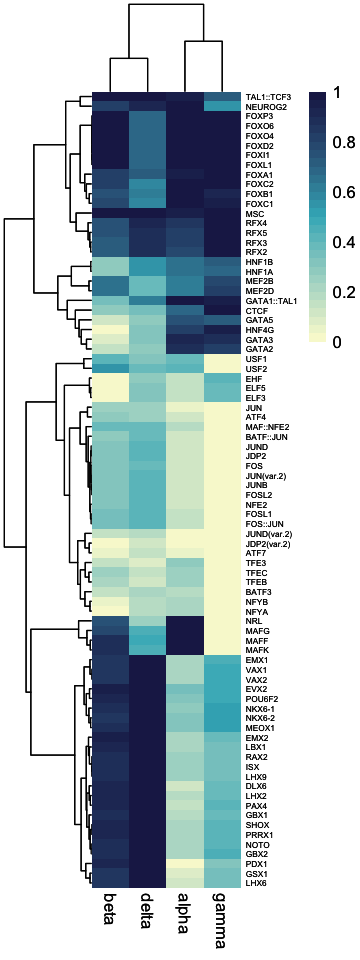

In [92]:
# heatmap -----------------------------------------------------------------
options(repr.plot.width = 3, repr.plot.height = 8)

select.motifs <- (input.chromVar.jaspar.var%>%filter(variability>1.2))$name

if(T){
  h<-pheatmap(output.chromvar.jaspar.z.avg_by_ct[select.motifs,c('alpha','beta','delta','gamma')],scale = "none",
           cluster_cols = T, border_color = NA,
           show_rownames = T,fontsize_row = 5,
           color = cols.hm.avg.tf(30))
  print(h)
}            #clustering_method = "ward.D2",


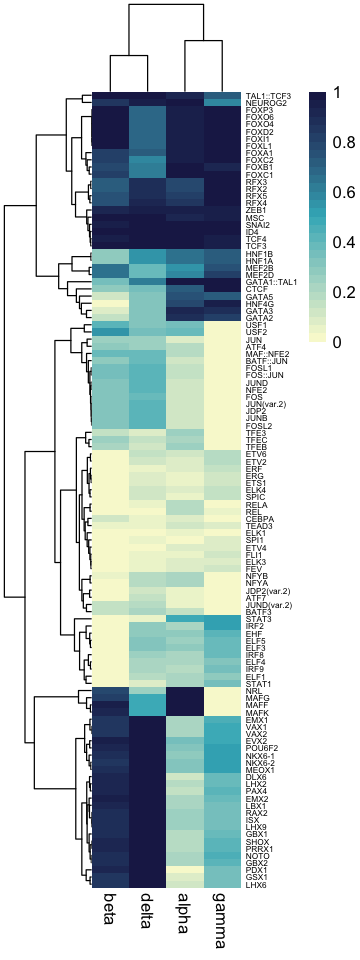

In [12]:
# heatmap -----------------------------------------------------------------
options(repr.plot.width = 3, repr.plot.height = 8)

select.motifs <- (input.chromVar.jaspar.var%>%filter(variability>1.2))$name

if(T){
  pheatmap(output.chromvar.jaspar.z.avg_by_ct[select.motifs,c('alpha','beta','delta','gamma')],scale = "none",
           cluster_cols = T, border_color = NA,
           show_rownames = T,fontsize_row = 5,
           color = cols.hm.avg.tf(30))
  
}            #clustering_method = "ward.D2",


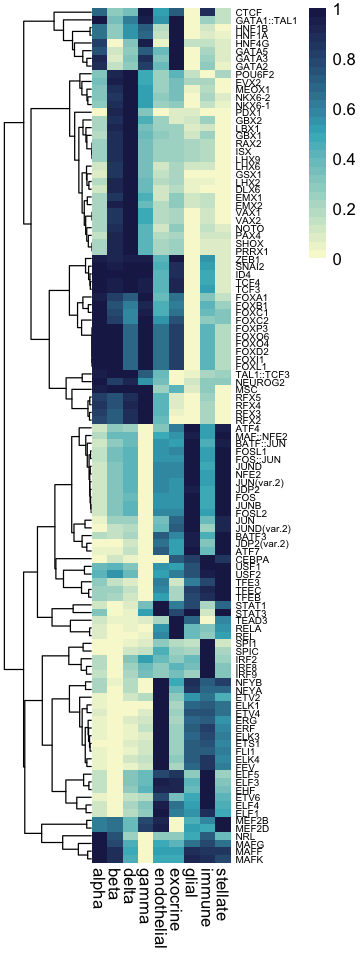

In [25]:
# heatmap -----------------------------------------------------------------

select.motifs <- (input.chromVar.jaspar.var%>%filter(variability>1.2))$name

if(T){
  pheatmap(output.chromvar.jaspar.z.avg_by_ct[select.motifs,c(1:3,6,4:5,7:9)],scale = "none",
           cluster_cols = F, border_color = NA,
           #clustering_method = "ward.D2",
           show_rownames = T,fontsize_row = 6,
           color = cols.hm.avg.tf(30))
  
}

In [ ]:
# heatmap -----------------------------------------------------------------

select.motifs <- (input.chromVar.jaspar.var%>%filter(variability>1.2))$name

if(F){
  pheatmap(output.chromvar.jaspar.z.avg_by_ct[select.motifs,c(1:3,6,4:5,7:9)],scale = "none",
           cluster_cols = F, border_color = NA,
           #clustering_method = "ward.D2",
           show_rownames = T,fontsize_row = 6,
           color = cols.hm.avg.tf(30))
  
}

if(T){
  callback = function(hc, mat){
    #sv <- apply(mat, 1, which.max)
    dend =rev(as.dendrogram(hc))
    as.hclust(dend)
  }
  
png(filename = "overall_avg_motif_all_cell_type.png",height = 7.5,width = 3,units = 'in',res = 300)
pdf(file = "overall_avg_motif_all_cell_type.pdf",height = 7.5,width = 3)
  p <- pheatmap(output.chromvar.jaspar.z.avg_by_ct[select.motifs,c(1:3,6,5,8,7,9,4)],scale = "none",
           cluster_cols = T,clustering_callback = callback,
           clustering_method = "ward.D2",treeheight_row = 0,
           show_rownames = T,fontsize_row = 5,border_color = NA,
           color = cols.hm.avg.tf(30))
  print(p)
dev.off()

}


pd <- output.chromvar.jaspar.z.avg_by_ct[select.motifs,c(1:3,6,5,8,7,9,4)]
pd <- pd[p$tree_row$order,]
require(ggdendro)
hc <- hclust(dist(t(pd)))
dd <- rev(as.dendrogram(hc))
dd.reorder <- reorder(dd,1:9)
hc <- as.hclust(rev(dd.reorder))

hc$order
if(T){
  #dd.reorder <- reorder(dd,c(1,3,2,4,5,6,7,8,9))
  plot(dd.reorder)
  plot(dd)
}

pd <- pd[,hc$order]
p <- pheatmap(pd,scale = "none",cluster_rows = F,
              cluster_cols = F,clustering_callback = callback,
              clustering_method = "ward.D2",treeheight_row = 0,
              show_rownames = T,fontsize_row = 5,border_color = NA,
              color = cols.hm.avg.tf(30))
ggdendrogram(hc,  size = 2)+coord_flip()
saveRDS(list(pd=pd,hc=hc),'../dat/figdata/Fig1E.Rdata')

motif.list <- c("PDX1","RFX2","FOXO4","HNF1A","IRF2","ETS1","MEF2B","MAFK")
row_labs <- sapply(select.motifs, function(x) ifelse(x %in% motif.list,x,""))
png(filename = "overall_avg_motif_all_cell_type_hightlight.png",height = 7.5,width = 3,units = 'in',res = 300)
pdf(file = "overall_avg_motif_all_cell_type_hightlight.pdf",height = 7.5,width = 3)
pheatmap(output.chromvar.jaspar.z.avg_by_ct[select.motifs,c(1:3,6,5,8,7,9,4)],scale = "none",
         cluster_cols = F,clustering_callback = callback,
         clustering_method = "ward.D2",
         labels_row = row_labs,
         show_rownames = T,fontsize_row = 6,border_color = NA,
         color = cols.hm.avg.tf(30))
dev.off()
}




